# 학습 목표

1. OCR의 과정을 이해합니다.
2. 문자인식 결과의 표현방식을 이해합니다.
3. 파이썬을 통해 OCR을 사용할 수 있습니다.

# 학습 내용

+ 기계가 읽을 수 있나요?
+ 어떤 과정으로 읽을까요?
+ 딥러닝 문자인식의 시작
+ 사진 속 문자 찾아내기 - detection
+ 사진 속 문자 읽어내기 - recognition
+ keras-ocr 써보기
+ 태서랙트 써보기
+ 프로젝트 : 다양한 OCR모델 비교하기

# Google OCR API, keras-ocr, Tesseract 비교하기

여러가지 OCR모델 중에성 용도에 맞게 적절한 것을 선택해야 한다.

## Step1. 검증용 데이터셋 준비

OCR 관련해서 다루어본 주제는  
>텍스트의 모양과 크기  
배치  
노이즈   

OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 

=> 조원들과 함께 사진을 모았다.

## Step2. Google OCR API, keras-ocr, Tesseract로 테스트 진행

### Google OCR API

**STEP 1) 구글의 파이썬 API 인터페이스 모듈을 아래와 설치합니다.**  
```
$ pip install --upgrade google-api-python-client
$ pip install google-cloud-vision
```

**STEP 2) Google Cloud Vision API 사용**  
아래 링크의 설명을 참고하여 서비스 계정 및 인증키를 생성  
브라우저에서 다운로드한 인증키는 다음 경로에 my_google_api_key.json이라는 파일명으로 저장해둡시다.  
(파일은 처음에 sheet-contents-로 시작되는 이름으로 자동 저장됩니다.)  
[Google Cloud Vision API 사용하기](http://egloos.zum.com/mcchae/v/11342622)
```
$ cp ~/Downloads/sheet-contents-xxxx.json ~/aiffel/ocr_python/my_google_api_key.json  
```

**STEP 3) 인증키 경로 등록 후 커널 재기동**  
터미널을 열고 아래와 같이 인증키 경로 변수를 등록한 후 커널을 종료하고 재기동합니다.
```
$ export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json
```
만약 구글 API를 계속 사용하고 싶다면 아래와 같이 환경변수에 등록해 주면 위와 같이 매번 경로 변수 설정을 하지 않아도 됩니다.

```
$ echo "export GOOGLE_APPLICATION_CREDENTIALS=$HOME/aiffel/ocr_python/my_google_api_key.json" >> ~/.bashrc
```

**STEP 4) API 사용 테스트**  

In [1]:
# API를 활용하는 코드  
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [19]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
# (예시) path = os.getenv('HOME')+'/aiffel/ocr_python/test_image.png'
path_1 = os.getenv('HOME')+'/aiffel/ocr_python/image/1.jpg'
path_2 = os.getenv('HOME')+'/aiffel/ocr_python/image/2.jpg'
path_3 = os.getenv('HOME')+'/aiffel/ocr_python/image/3.jpg'
path_4 = os.getenv('HOME')+'/aiffel/ocr_python/image/4.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
print('---------------')
detect_text(path_1)

-rw-r--r-- 1 aiffel-dj35 aiffel-dj35 2330  3월 16 10:04 /home/aiffel-dj35/aiffel/ocr_python/my_google_api_key.json
---------------
Texts:

"REPLACE THE
FEAR OF THE
UNKNOWN WITH
CURIOSITY.
"

"REPLACE"

"THE"

"FEAR"

"OF"

"THE"

"UNKNOWN"

"WITH"

"CURIOSITY."
bounds: (106,136),(403,138),(403,181),(106,179)


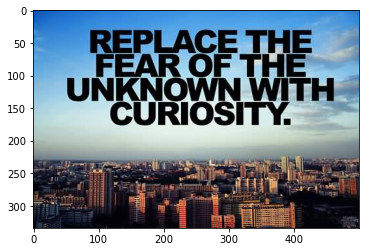

In [3]:
from PIL import Image
import matplotlib.pylab as plt

one = Image.open(path_1)
plt.imshow(one)
plt.show()

In [4]:
detect_text(path_2)

Texts:

"REPLACE:
FEAR OF
THE UNKNOWN
WITH N
LCURIOSITY:1
"

"REPLACE:"

"FEAR"

"OF"

"THE"

"UNKNOWN"

"WITH"

"N"

"LCURIOSITY:1"
bounds: (1,304),(699,296),(700,367),(2,375)


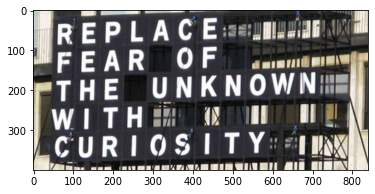

In [5]:
two = Image.open(path_2)
plt.imshow(two)
plt.show()

In [6]:
detect_text(path_3)

Texts:

"RIGHT
LANE
MUST
TURN
Cro RIGHT
NO
TURN
ON
RED
"

"RIGHT"

"LANE"

"MUST"

"TURN"

"Cro"

"RIGHT"

"NO"

"TURN"

"ON"

"RED"
bounds: (389,513),(468,514),(468,552),(389,551)


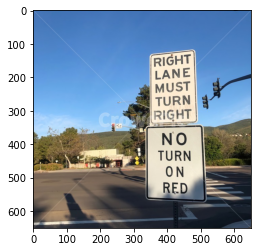

In [7]:
three = Image.open(path_3)
plt.imshow(three)
plt.show()

In [8]:
detect_text(path_4)

Texts:

"Please
Wait to be
Seated
NO OUTSIDE
"

"Please"

"Wait"

"to"

"be"

"Seated"

"NO"

"OUTSIDE"
bounds: (586,278),(645,284),(643,298),(585,292)


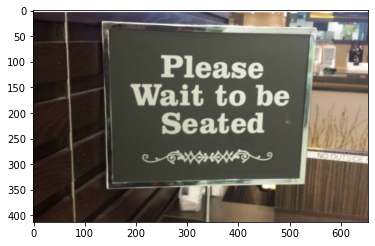

In [9]:
four = Image.open(path_4)
plt.imshow(four)
plt.show()

### keras-ocr

```
$ pip list | grep tensorflow

# 만약 tensorflow 버전이 맞지 않다면 재설치를 해줍시다. 
$ pip uninstall tensorflow
$ pip install tensorflow==2.2.0

# keras-ocr 사용을 위해서 설치
$ pip install keras-ocr

$ echo "export TF_FORCE_GPU_ALLOW_GROWTH=true" >> ~/.bashrc

$ echo $TF_FORCE_GPU_ALLOW_GROWTH
```

In [10]:
import keras_ocr
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

path_5 = os.getenv('HOME')+'/aiffel/ocr_python/image/5.png'
path_7 = os.getenv('HOME')+'/aiffel/ocr_python/image/7.jpg'
path_6 = os.getenv('HOME')+'/aiffel/ocr_python/image/book.png'
path_8 = os.getenv('HOME')+'/aiffel/ocr_python/image/msm_cream.png'

image_urls = [path_5, path_6, path_7, path_8]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

Looking for /home/aiffel-dj35/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj35/.keras-ocr/crnn_kurapan.h5


/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


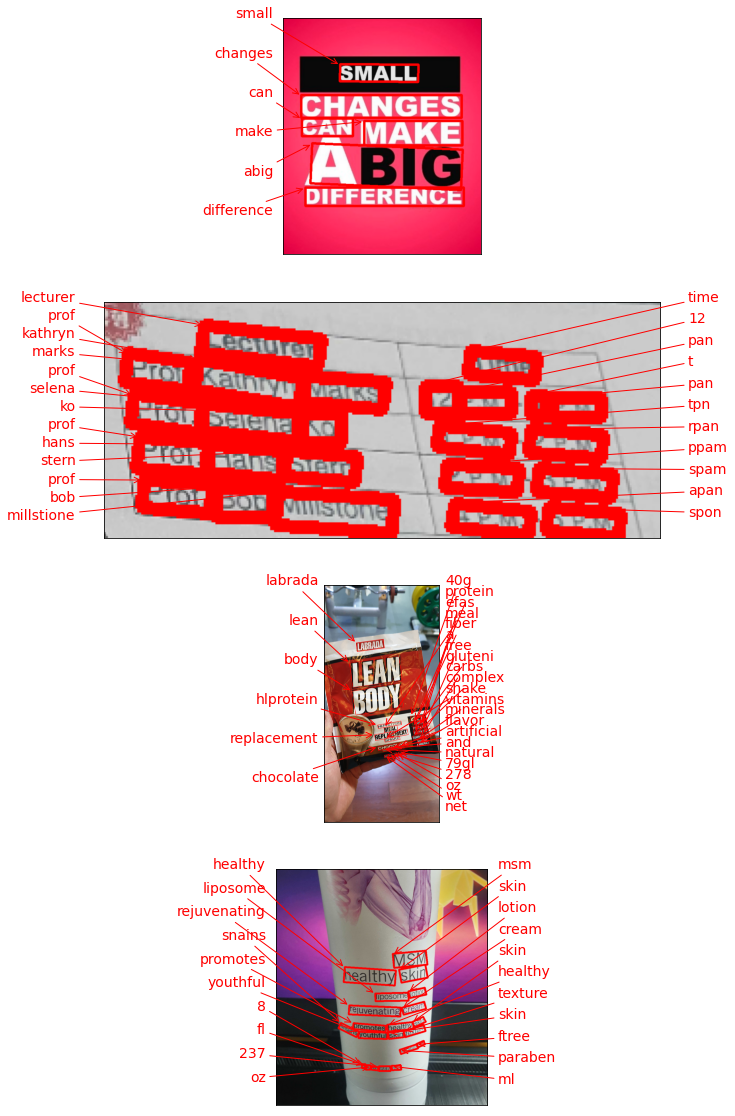

In [11]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract

```
$ sudo apt install tesseract-ocr
$ sudo apt install libtesseract-dev

$ pip install pytesseract

```

In [12]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/tesla_2.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel-dj35/aiffel/ocr_python/image/0000.png
/home/aiffel-dj35/aiffel/ocr_python/image/0001.png
/home/aiffel-dj35/aiffel/ocr_python/image/0002.png
/home/aiffel-dj35/aiffel/ocr_python/image/0003.png
/home/aiffel-dj35/aiffel/ocr_python/image/0004.png
/home/aiffel-dj35/aiffel/ocr_python/image/0005.png
/home/aiffel-dj35/aiffel/ocr_python/image/0006.png


인식하는 언어를 한글로 변경하고 싶다면  
테서랙트의 언어팩을 설치하고 위 코드에서 lang='kor' 로 바꾸면 된다

```
$ sudo apt install tesseract-ocr-kor
```

#### lang='eng'

In [13]:
def recognize_images_eng(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images_eng(cropped_image_path_list)

Adams

Tesia

Tnank

YOu

for

YOur

purchase

Done


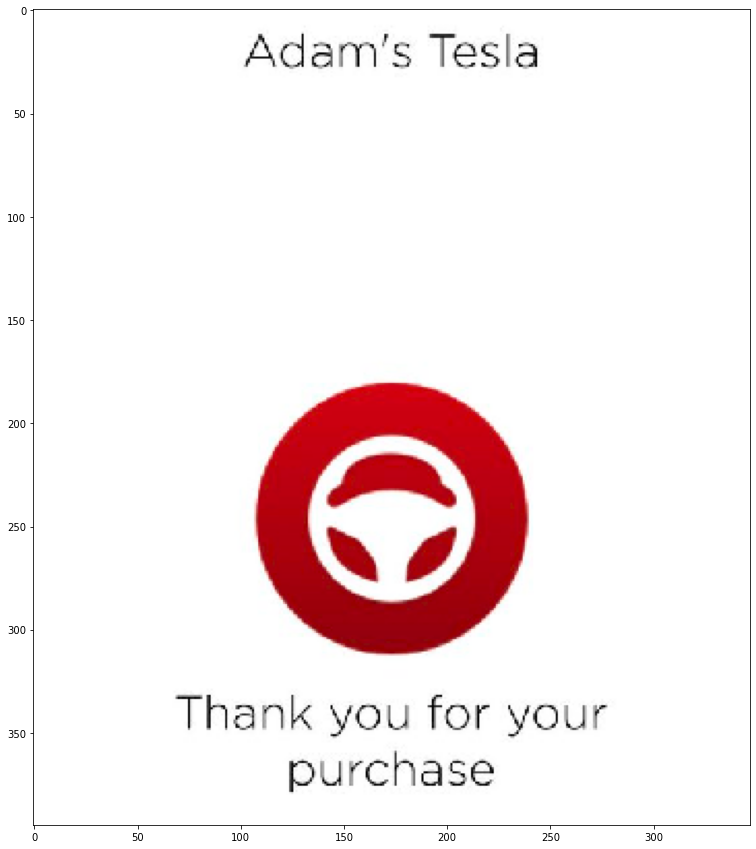

In [14]:
path_9 = os.getenv("HOME")+'/aiffel/ocr_python/image/tesla_2.png'
nine = Image.open(path_9)
plt.figure(figsize=(15, 15))
plt.imshow(nine)
plt.show()

#### lang='kor'

In [15]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/lamen.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/home/aiffel-dj35/aiffel/ocr_python/image/0000.png
/home/aiffel-dj35/aiffel/ocr_python/image/0001.png
/home/aiffel-dj35/aiffel/ocr_python/image/0002.png
/home/aiffel-dj35/aiffel/ocr_python/image/0003.png
/home/aiffel-dj35/aiffel/ocr_python/image/0004.png
/home/aiffel-dj35/aiffel/ocr_python/image/0005.png
/home/aiffel-dj35/aiffel/ocr_python/image/0006.png
/home/aiffel-dj35/aiffel/ocr_python/image/0007.png
/home/aiffel-dj35/aiffel/ocr_python/image/0008.png
/home/aiffel-dj35/aiffel/ocr_python/image/0009.png
/home/aiffel-dj35/aiffel/ocr_python/image/0010.png
/home/aiffel-dj35/aiffel/ocr_python/image/0011.png
/home/aiffel-dj35/aiffel/ocr_python/image/0012.png
/home/aiffel-dj35/aiffel/ocr_python/image/0013.png


In [16]:
def recognize_images_kor(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images_kor(cropped_image_path_list)

ㄴ'\바라디라대


0,.000위

신한

논코츠

륙수에 마들과


나져놀고

구로대뉴노

숭마즐

살닌

담택하그

달딜딘

~

Done


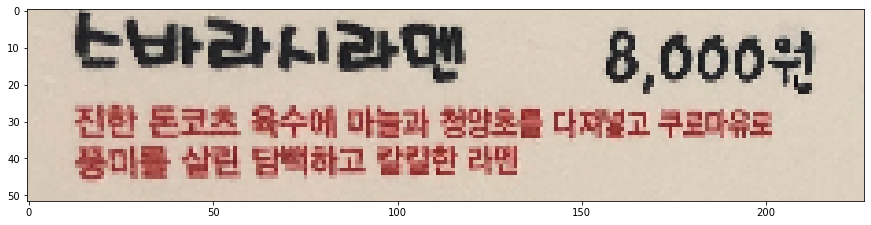

In [17]:
path_10 = os.getenv("HOME")+'/aiffel/ocr_python/image/lamen.png'
ten = Image.open(path_10)
plt.figure(figsize=(15, 15))
plt.imshow(ten)
plt.show()

한글 인식 성능이 아주 떨어진다.

## Step3. 테스트 결과 정리

간단한 사진 한장으로 3가지 모델을 비교해보자

In [20]:
# google ocr
path_9 = os.getenv("HOME")+'/aiffel/ocr_python/image/tesla_2.png'

print('---------------')
detect_text(path_9)

---------------
Texts:

"Adam's Tesla
Thank you for your
purchase
"

"Adam's"

"Tesla"

"Thank"

"you"

"for"

"your"

"purchase"
bounds: (124,358),(222,359),(222,379),(124,378)


In [28]:
# keras-ocr
pipeline = keras_ocr.pipeline.Pipeline()
image_urls = [path_8, path_9]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

Looking for /home/aiffel-dj35/.keras-ocr/craft_mlt_25k.h5
Looking for /home/aiffel-dj35/.keras-ocr/crnn_kurapan.h5


/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


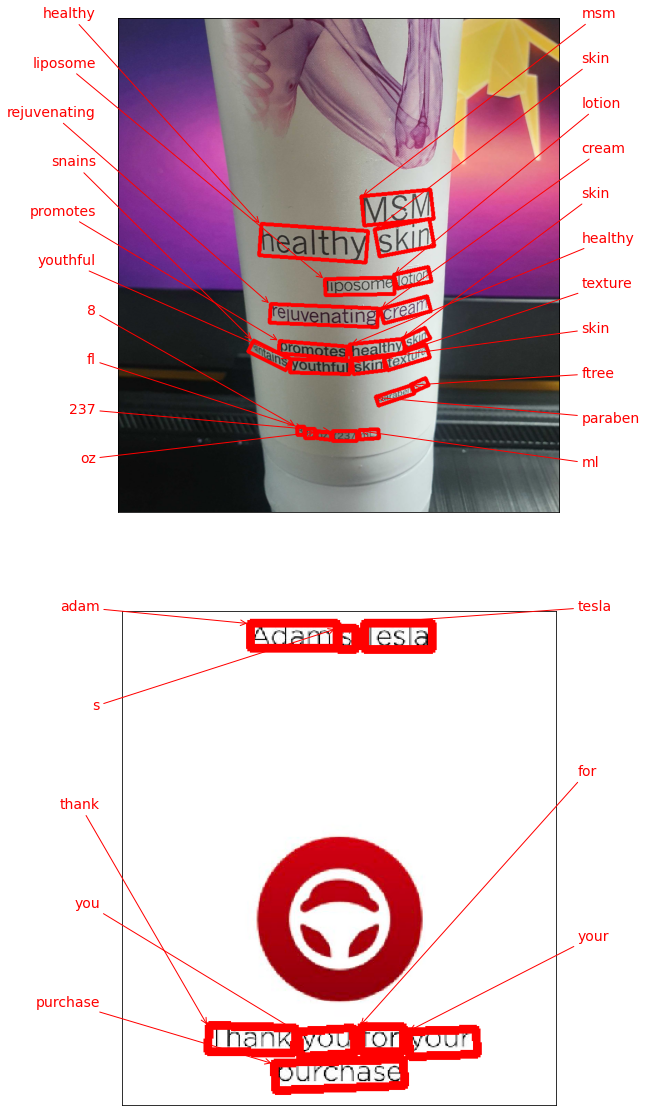

In [29]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0], ax=ax)

In [30]:
# Tesseract
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/image'
img_file_path = work_dir + '/tesla_2.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

recognize_images_eng(cropped_image_path_list)

/home/aiffel-dj35/aiffel/ocr_python/image/0000.png
/home/aiffel-dj35/aiffel/ocr_python/image/0001.png
/home/aiffel-dj35/aiffel/ocr_python/image/0002.png
/home/aiffel-dj35/aiffel/ocr_python/image/0003.png
/home/aiffel-dj35/aiffel/ocr_python/image/0004.png
/home/aiffel-dj35/aiffel/ocr_python/image/0005.png
/home/aiffel-dj35/aiffel/ocr_python/image/0006.png
Adams

Tesia

Tnank

YOu

for

YOur

purchase

Done


tesseract가 가장 성능이 떨어졌다.   
소문자 L을 대문자 I로 잘못인식하고    
알파벳 o를 숫자 0으로 잘못인식하고   
알파벳 h를 n으로 잘못인식했다.   

구글과 케라스는 이미지의 문자를 잘 인식했다. 

## Step4. 결과 분석과 결론 제시

ocr이 잘 작동된다면, 많은 글이 있는 책을 인식시켜서  
nlp에 사용할 데이터를 만들 수 있을 것이다.  
책에는 많은 양의 글자가 있기 때문에 구글과 케라스 모두 부합한다.  
그런데 시각화까지 필요하지 않기 때문에 구글이 더 적합하다고 볼 수 있다.  


# 루브릭

1. OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?   
   목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.  
   -> 파일이 없는 책을 단순하게 카피하는 것보다 사진을 찍어서 빠르게 언어 데이터를 수집하는 서비스 구현  
   ok
   
  
2. 모델 평가기준이 명확하고 체계적으로 세워졌는가?    
   평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.   
   -> 시각화까지는 필요하지 않기 때문에 가볍고 빠르게 돌아가는 구글을 선택한다.   
   ok
   
   
3. 평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?  
   최대 20장까지의 테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.  
   -> 총 9장의 사진을 테스트했다.  
   ok

# 고찰

서비스를 생각하면서 생각을 이미지화 할 수 있었다.  
해커톤에서 구체화할 수 있을지 고민해야겠다.  
정확하게 모델마다의 메모리 할당량과 시간까지 재고 싶었는데 그 부분까지 해커톤에서 할 수 있으면 좋겠다.